In [1]:
import os
import json
import pickle
import numpy as np
import glob
import re
import math
import matplotlib.pyplot as plt

In [103]:
loss_data = np.load("../../../tmp/BruteForce/RiceGrip/sysid/0000.npy", allow_pickle=True)

In [104]:
loss_data.shape

(125, 40)

In [105]:
loss = loss_data.mean(axis=1)

In [71]:
heat_min = loss.min()
heat_max = loss.max()

In [72]:
N_GRID = 5
loss_grid = np.zeros((N_GRID, N_GRID, N_GRID))
data_i = 0
for p1 in range(N_GRID):
    for p2 in range(N_GRID):
        for p3 in range(N_GRID):
            loss_grid[p1, p2, p3] = loss[data_i]
            data_i += 1

In [ ]:
heat_min = loss_grid.min()
heat_max = loss_grid.max()

x = np.arange(0, 5, 1)
y = np.arange(0, 5, 1)
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(20, N_GRID))

for col_i in range(N_GRID):
    plt.subplot(1, N_GRID, col_i+1)
    plt.pcolor(X, Y, loss_grid[col_i], cmap='coolwarm', vmin=heat_min, vmax=heat_max)
    plt.title("clusterStiffness = " + str(col_i))
    plt.ylabel('clusterPlasticThreshold') 
    plt.xlabel('clusterPlasticCreep')
    
plt.colorbar()
plt.show()

# plt.savefig("loss_grid", facecolor='w', transparent=False)

In [116]:
x = np.arange(0, 5, 1)
y = np.arange(0, 5, 1)
X, Y = np.meshgrid(x,y)

def show_hists(d, title):
    fig = plt.figure(figsize=(25, N_GRID))
    fig.suptitle(title, fontsize="x-large")
    for col_i in range(N_GRID):
        plt.subplot(1, N_GRID, col_i+1)
        plt.pcolor(X, Y, d[:,:,col_i], cmap='coolwarm', vmin=heat_min, vmax=heat_max)
        plt.title("nu = " + str(col_i))
        plt.ylabel('YS') 
        plt.xlabel('E')
    plt.colorbar()
    plt.savefig(title, facecolor='w', transparent=False)
    plt.show()

# def show_hists(d, title):
#     fig, axs = plt.subplots(1,N_GRID, figsize=(20, N_GRID))
#     for col_i in range(N_GRID):
#         plot = axs[col_i].imshow(d[:,:,col_i] , cmap = 'coolwarm' , interpolation = 'nearest', vmin=heat_min, vmax=heat_max)
#         axs[col_i].title.set_text("nu = " + str(col_i))
#         axs[col_i].set_xlabel('E')
#         axs[col_i].set_ylabel('YS')
#     plt.suptitle(title, y=0.87, fontweight ="bold")
#     plt.savefig(title, facecolor='w', transparent=False)
#     plt.draw()

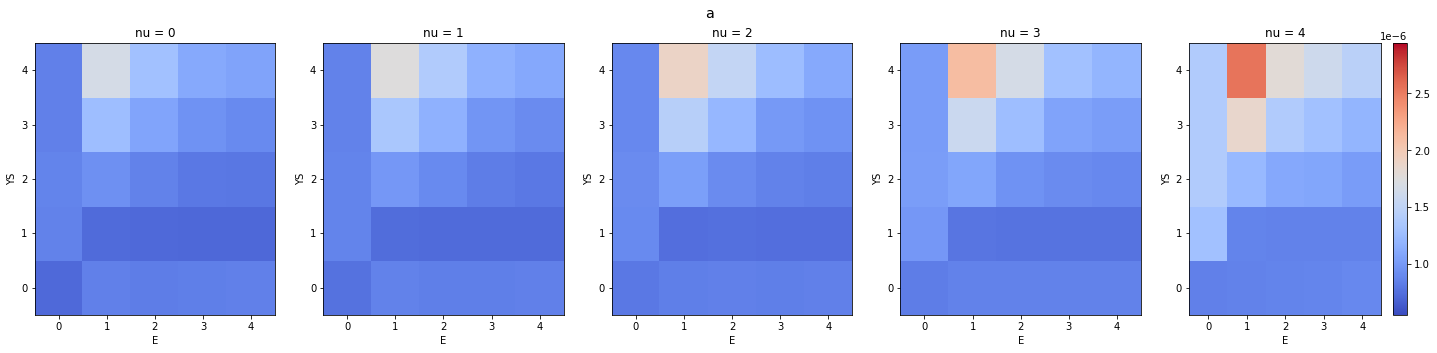

In [117]:
show_hists(loss_grid, "a")

In [95]:
def id_to_params(idx):
    p1 = int(idx / 25)
    p2 = int(idx / 5) % 5
    p3 = idx % 5
    return p1, p2, p3

# [nu, E, YS]
def params_to_id(YS, E, nu):
    # return nu * 25 + E * 5 + YS
    return nu + E * 5 + YS * 25

In [112]:
params_to_id(4, 1, 4)

109

In [113]:
loss[109]

2.735493e-06

In [22]:
for param_i, corner in enumerate(corners):
    loss_data = np.load("../../../tmp/BruteForce/PressDown/sysid/" + corner + ".npy", allow_pickle=True)
    loss = loss_data.mean(axis=1)
    print(loss.argmin(), id_to_params(loss.argmin()))

NameError: name 'corners' is not defined

0


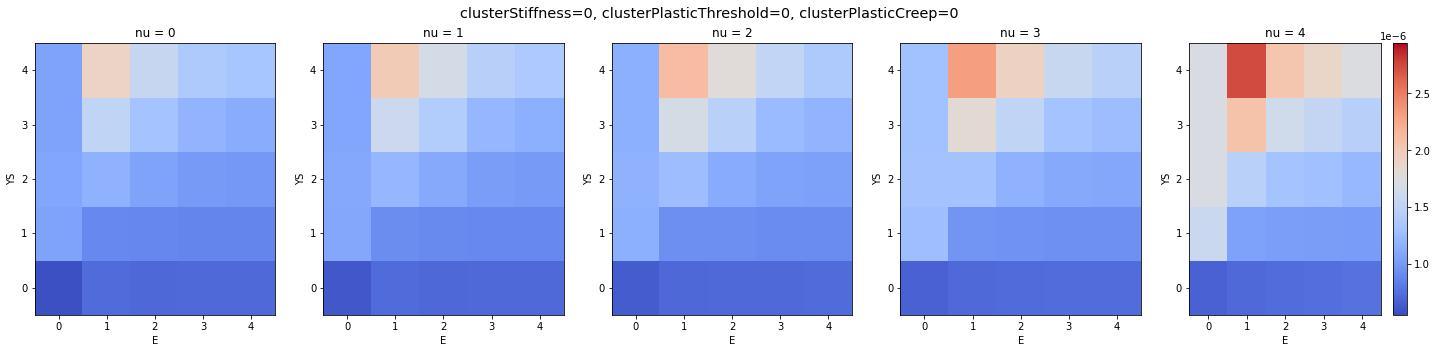

0


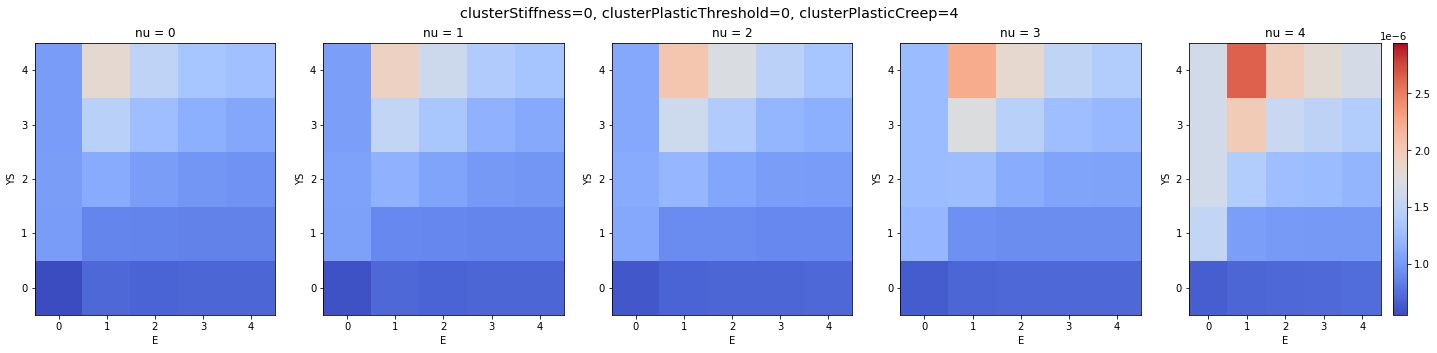

0


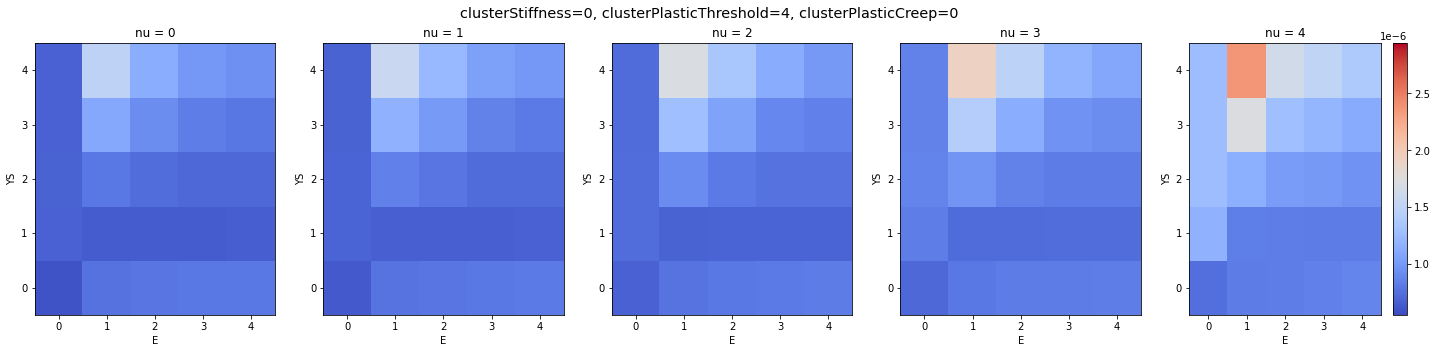

0


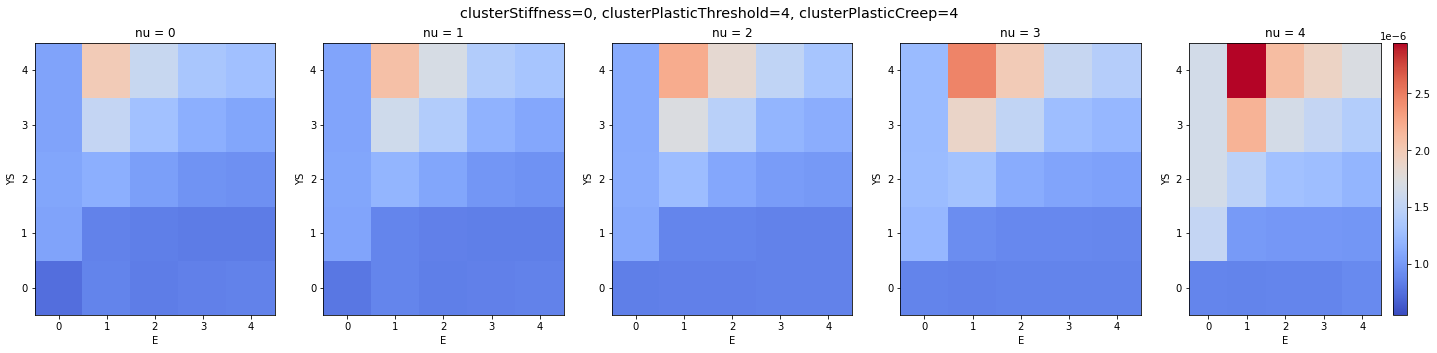

0


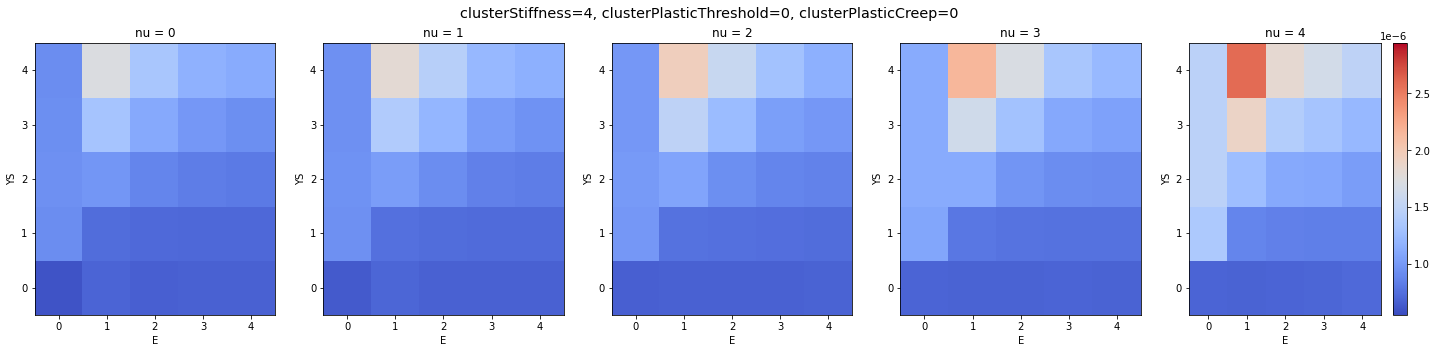

0


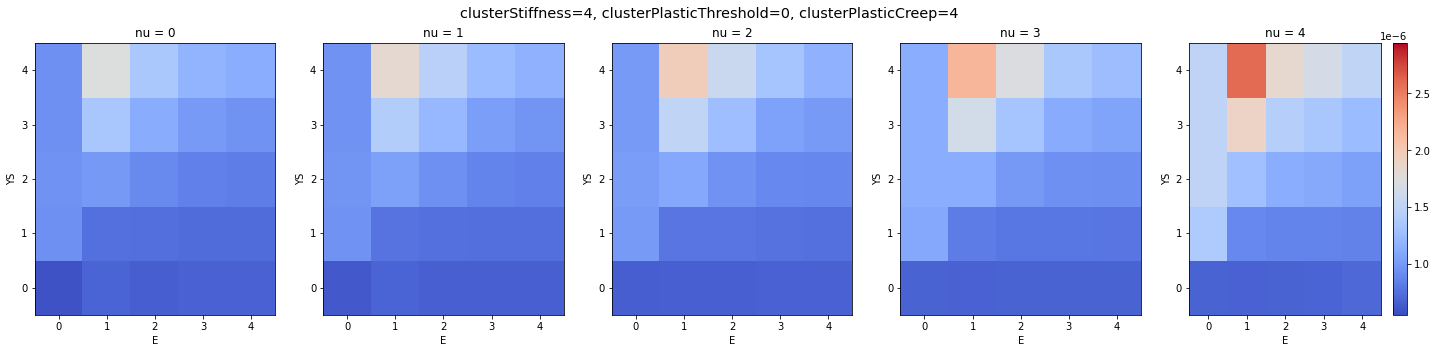

0


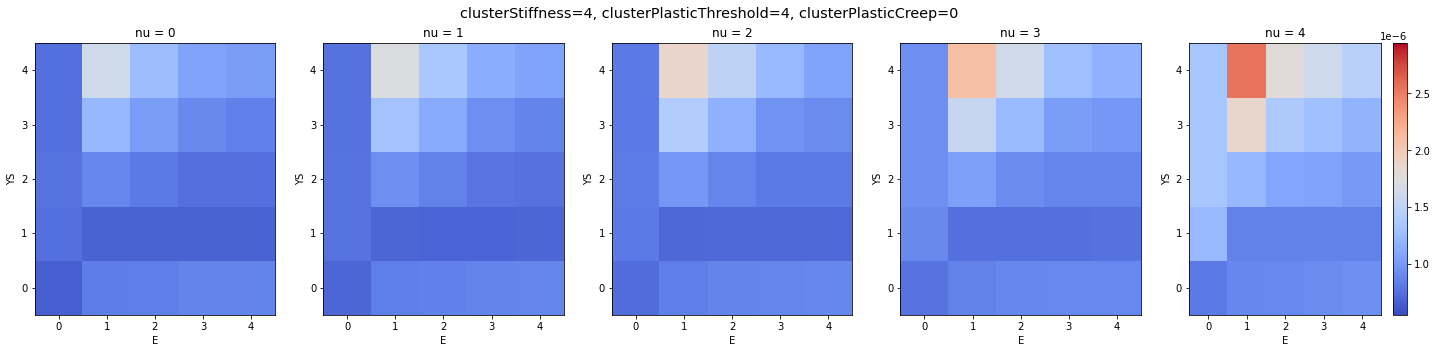

40


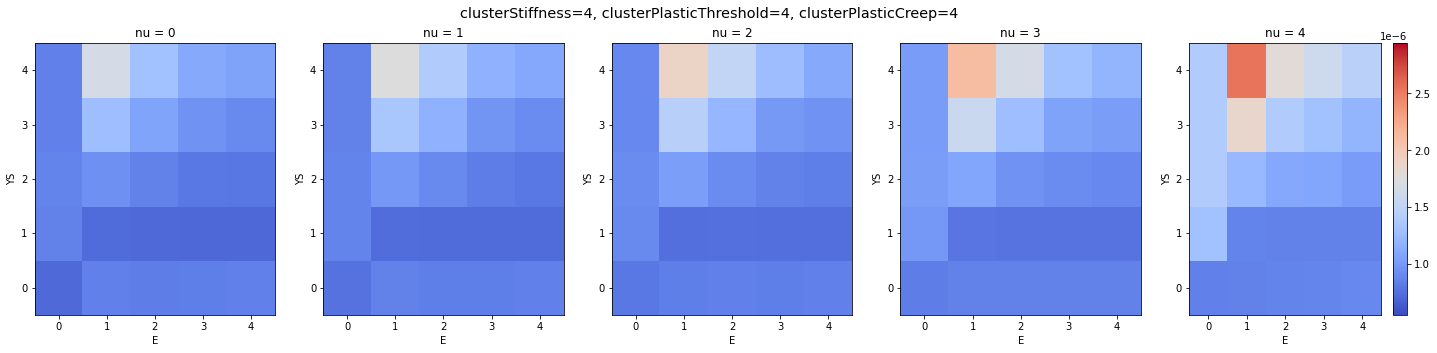

In [118]:
corners = ["0000", "0004", "0019", "0024", "0100", "0104", "0119", "0124"]
params = [
    "clusterStiffness=0, clusterPlasticThreshold=0, clusterPlasticCreep=0",
    "clusterStiffness=0, clusterPlasticThreshold=0, clusterPlasticCreep=4",
    "clusterStiffness=0, clusterPlasticThreshold=4, clusterPlasticCreep=0",
    "clusterStiffness=0, clusterPlasticThreshold=4, clusterPlasticCreep=4",
    "clusterStiffness=4, clusterPlasticThreshold=0, clusterPlasticCreep=0",
    "clusterStiffness=4, clusterPlasticThreshold=0, clusterPlasticCreep=4",
    "clusterStiffness=4, clusterPlasticThreshold=4, clusterPlasticCreep=0",
    "clusterStiffness=4, clusterPlasticThreshold=4, clusterPlasticCreep=4",
]

for param_i, corner in enumerate(corners):
    loss_data = np.load("../../../tmp/BruteForce/RiceGrip/sysid/" + corner + ".npy", allow_pickle=True)
    loss = loss_data.mean(axis=1)
    
    heat_min = min(heat_min, loss.min())
    heat_max = max(heat_max, loss.max())


for param_i, corner in enumerate(corners):
    loss_data = np.load("../../../tmp/BruteForce/RiceGrip/sysid/" + corner + ".npy", allow_pickle=True)
    loss = loss_data.mean(axis=1)
    print(loss.argmin())
    
    N_GRID = 5
    loss_grid = np.zeros((N_GRID, N_GRID, N_GRID))
    data_i = 0
    for p1 in range(N_GRID):
        for p2 in range(N_GRID):
            for p3 in range(N_GRID):
                loss_grid[p1, p2, p3] = loss[data_i]
                data_i += 1
    
    show_hists(loss_grid, params[param_i])

In [35]:
loss_grid.min()

7.063296152409748e-07

In [36]:
loss_grid.max()

2.5454753540543607e-06